# 1. Exploratory Data Analysis


In [1]:
# Import libraries

# Utilities
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 300

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# SKlearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
import time
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


# Stats
from scipy import stats

In [2]:
# load the data
df = pd.read_csv("gender_classification.csv")

In [3]:
# Viewing the top 5 rows
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
# Display shape of data frame
df.shape

(5001, 8)

In [5]:
# Display info of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


# 2. Data Cleaning/Preparation

In [6]:
# View sum of NA and drop those with majority NaN values
df.isna().sum().sort_values()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [7]:
# Replace Female to 1 and Male to 0

df['gender'].replace({'Male': 0, 'Female': 1},inplace = True)

In [8]:
# Standardize data using MinMax Scaler

scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.0,0.097561,0.50,1.0,0.0,1.0,1.0,0.0
1,0.0,0.634146,0.15,0.0,0.0,1.0,0.0,1.0
2,0.0,0.097561,0.60,1.0,1.0,1.0,1.0,0.0
3,0.0,0.731707,0.50,0.0,1.0,1.0,1.0,0.0
4,1.0,0.512195,0.40,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

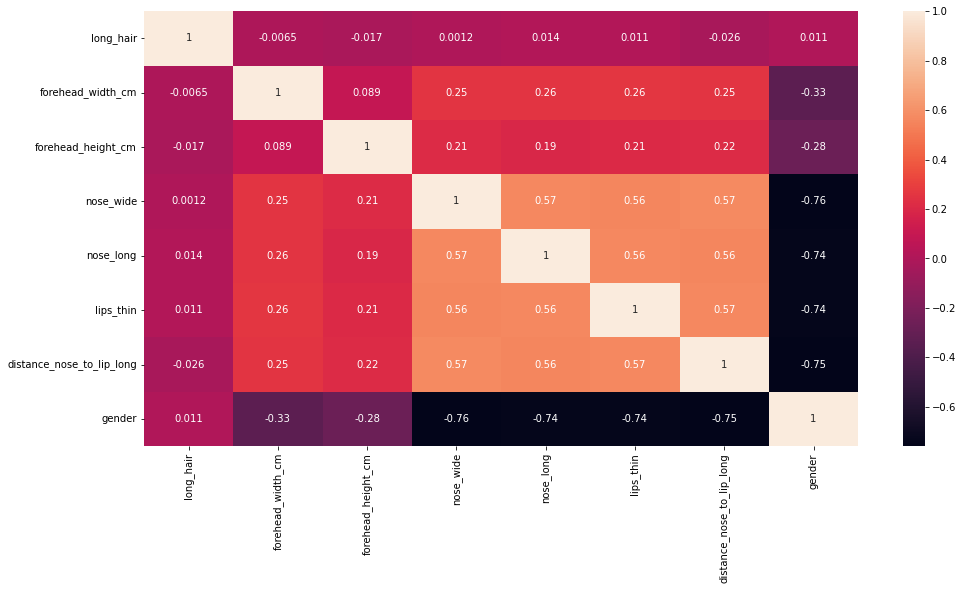

In [9]:
# Heat-map

plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True)

# 3. Determining the best model

In [10]:
# Using Feature Selection to find recommended columns for gender classification

X = df.loc[:,df.columns!='gender']
y = df[['gender']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['nose_wide', 'lips_thin', 'distance_nose_to_lip_long'], dtype='object')


In [11]:
# Assigned a new df with the selected columns

df = df[['nose_wide','lips_thin','distance_nose_to_lip_long', 'gender']]
X = df.iloc[:,:3].values
y = df['gender'].values

## 3.1 K Nearest Neighbor

In [12]:
# Initialize, train & fit the model

t0=time.time()

knn= KNeighborsClassifier(n_neighbors=3 , metric= 'minkowski', p=2) 
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.20, random_state = 42)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
score = accuracy_score(y_test,y_pred)

print('Accuracy :',round(score*100,2), '%')
print('Time taken :' , round(time.time()-t0,2), 'S')

Accuracy : 95.6 %
Time taken : 0.04 S


In [13]:
# Compare table

compare_df = pd.DataFrame({"Actuals": y_test,
                          "Predicted": y_pred})
compare_df.head(20)

,Actuals,Predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
5,1.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,1.0,1.0


In [14]:
# Precision

test_pre = precision_score(y_test, y_pred)
print("Precision = {:.2f}".format(test_pre))

Precision = 0.95


Confusion Matrix = 
 [[476  23]
 [ 21 481]]


<AxesSubplot:>

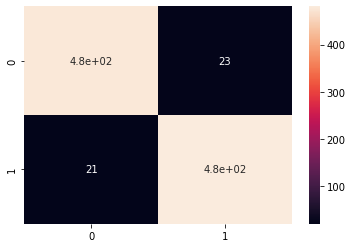

In [15]:
# Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix = \n", str(conf_mat))

# Heat map of conf_mat

sns.heatmap(conf_mat, annot=True)

In [16]:
# Recall
test_rec = recall_score(y_test, y_pred)
print("Recall = {:.2f}".format(test_rec))

Recall = 0.96


In [17]:
# Own Prediction 

def action():
    loop = True
    while loop:
        print("1. Predict your gender using variables")
        print("2. Exit the Programme")
        choice = int(input("Choose Option "))

        if choice == 1:
                            
            print("Input 1 for Yes, 0 for No")
            nose_wide = float(input("Is your nose wide?: "))
            lips_thin = float(input("Are your lips thin?: "))
            distance = float(input("Is the distance from your nose to lips long?: " ))
            
            own_pred = [[nose_wide, lips_thin, distance]]
            ans = knn.predict(own_pred)
            if ans == 1:
                print("\n" "Your predicted gender is: Female" "\n")
            else:
                print("\n" "Your predicted gender is Male" "\n")

        elif choice == 2:
            print("Exiting programme, bye bye!")
            break
                     
        else:
            print("Wrong input, please try again")   

action()

1. Predict your gender using variables
2. Exit the Programme
Choose Option 2
Exiting programme, bye bye!


## 3.2 Naive Bayes

In [18]:
# Naive Bayes

t0=time.time()

classify = GaussianNB()
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.20, random_state = 42)
classify.fit(X_train, y_train)
y_pred = classify.predict(X_test)
score = accuracy_score(y_test,y_pred)

print('Accuracy :',round(score*100,2), '%')
print('Time taken :' , round(time.time()-t0,2), 'S')

Accuracy : 95.6 %
Time taken : 0.0 S


Confusion Matrix = 
 [[476  23]
 [ 21 481]]


<AxesSubplot:>

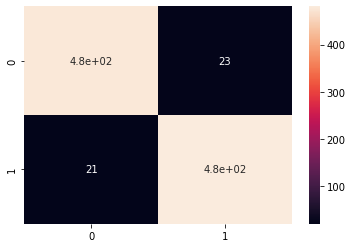

In [19]:
# Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix = \n", str(conf_mat))

# Heat map of conf_mat

sns.heatmap(conf_mat, annot=True)

In [20]:
# Precision

test_pre = precision_score(y_test, y_pred)
print("Precision = {:.2f}".format(test_pre))

Precision = 0.95


In [21]:
# Recall

test_rec = recall_score(y_test, y_pred)
print("Recall = {:.2f}".format(test_rec))

Recall = 0.96


In [22]:
# Cross validation

NB = classify = GaussianNB()

score = cross_val_score(NB, X_train, y_train, cv = 10)
print("Accuracy of the model: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy of the model: 0.96 (+/- 0.02)


#### Conclusion

In conclusion, while the accuracy score of each model were identical, the K neighbor model had a slightly longer computational time, however, can be considered negligible. 

However, this is not to suggest that Naïve Bayes is of the better model based on this dataset. Naïve Bayes can suffer from the zero-probability problem, which according to Glen (2019), is defined as a particular attribute conditional probability equals zero. This will result in the model failing to produce a valid prediction completely.

For this dataset, both models have been assessed to be suitable due to its low computational time but highly accurate prediction.